In [301]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB, BernoulliNB 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt


In [302]:
tweets = pd.read_pickle('tweets_processed.pkl')
stocks = pd.read_pickle('stocks_processed.pkl')

In [303]:
stocks.index.rename(tweets.index.name, inplace=True)

In [304]:
df = pd.merge(tweets, stocks, on=[tweets.index.name])

In [305]:
df

retweets  favorites  replies  reply_count  \
date                                                                   
2012-01-03 00:00:00-05:00        93         21        3            0   
2012-01-04 00:00:00-05:00        10         11        6            1   
2012-01-06 00:00:00-05:00        50         16       18            0   
2012-01-11 00:00:00-05:00        68        325       28            0   
2012-01-12 00:00:00-05:00       110         30       14            0   
...                             ...        ...      ...          ...   
2020-04-27 00:00:00-05:00     18515      75253     3286            1   
2020-04-28 00:00:00-05:00     11782      99070     2953            1   
2020-04-29 00:00:00-05:00     69890     375033    51362            1   
2020-04-30 00:00:00-05:00     34932     142793    11017            1   
2020-05-01 00:00:00-05:00     31413     276423    38624            1   

                           closely_related  url_news  url_video  \
date                                                              
2012-01-03 00:00:00-05:00                0         0          0   
2012-01-04 00:00:00-05:00                0         0          0   
2012-01-06 00:00:00-05:00                1         0          0   
2012-01-11 00:00:00-05:00                0         0          0   
2012-01-12 00:00:00-05:00                1         0          0   
...                                    ...       ...        ...   
2020-04-27 00:00:00-05:00                1         1          0   
2020-04-28 00:00:00-05:00                0         0          0   
2020-04-29 00:00:00-05:00                0         1          0   
2020-04-30 00:00:00-05:00                0         0          0   
2020-05-01 00:00:00-05:00                1         0          0   

                           money_related  other_related  tesla  polarity  \
date                                                                       
2012-01-03 00:00:00-05:00              0            114      0  0.300000   
2012-01-04 00:00:00-05:00              0            131      0  0.495000   
2012-01-06 00:00:00-05:00              0            124      0  0.134722   
2012-01-11 00:00:00-05:00              0            117      1  0.350000   
2012-01-12 00:00:00-05:00              0            125      0  0.050000   
...                                  ...            ...    ...       ...   
2020-04-27 00:00:00-05:00              0            172      0  0.165909   
2020-04-28 00:00:00-05:00              0             65      0  0.198611   
2020-04-29 00:00:00-05:00              0             99      0  0.162500   
2020-04-30 00:00:00-05:00              0             87      0  0.073173   
2020-05-01 00:00:00-05:00              1            106      1  0.118046   

                           subjectivity  time_of_day  day_of_week  \
date                                                                
2012-01-03 00:00:00-05:00      0.308333     1.000000            1   
2012-01-04 00:00:00-05:00      0.661944    16.000000            2   
2012-01-06 00:00:00-05:00      0.255556    13.000000            4   
2012-01-11 00:00:00-05:00      0.650000    21.000000            2   
2012-01-12 00:00:00-05:00      0.400000    21.000000            3   
...                                 ...          ...          ...   
2020-04-27 00:00:00-05:00      0.341742    14.136364            0   
2020-04-28 00:00:00-05:00      0.305556    17.833333            1   
2020-04-29 00:00:00-05:00      0.283333     4.333333            2   
2020-04-30 00:00:00-05:00      0.171984    14.842105            3   
2020-05-01 00:00:00-05:00      0.329831    11.050000            4   

                           (TSLA_close_%, )  (NASDAQ_close_%, )  \
date                                                              
2012-01-03 00:00:00-05:00               NaN                 NaN   
2012-01-04 00:00:00-05:00         -0.013177           -0.000136   
2012-01-06 00:00:00-05:00         -0.007743            0.001633

In [306]:
df.columns = [str(name) for name in tweets.columns] + [name[0] for name in df.columns[14:]]

In [307]:
df.dropna(inplace=True)
df.describe()

retweets     favorites       replies  reply_count  \
count    1192.000000  1.192000e+03   1192.000000  1192.000000   
mean     7590.792785  4.799676e+04   1361.770134     0.739094   
std     20901.988549  1.072315e+05   3559.802004     0.439313   
min         0.000000  1.000000e+00      1.000000     0.000000   
25%       340.750000  8.202500e+02    105.750000     0.000000   
50%      1651.500000  9.610000e+03    393.000000     1.000000   
75%      5354.000000  4.618475e+04   1343.500000     1.000000   
max    340370.000000  1.711258e+06  51362.000000     1.000000   

       closely_related     url_news    url_video  money_related  \
count      1192.000000  1192.000000  1192.000000    1192.000000   
mean          0.432047     0.059564     0.088087       0.031040   
std           0.765819     0.236776     0.283541       0.182922   
min           0.000000     0.000000     0.000000       0.000000   
25%           0.000000     0.000000     0.000000       0.000000   
50%           0.000000     0.000000     0.000000       0.000000   
75%           1.000000     0.000000     0.000000       0.000000   
max           7.000000     1.000000     1.000000       2.000000   

       other_related        tesla     polarity  subjectivity  time_of_day  \
count    1192.000000  1192.000000  1192.000000   1192.000000  1192.000000   
mean      125.307047     0.404362     0.134393      0.347186    12.861099   
std        67.130871     0.624908     0.195177      0.219241     5.263388   
min         2.000000     0.000000    -0.800000      0.000000     0.000000   
25%        83.000000     0.000000     0.000000      0.203877     9.911184   
50%       121.000000     0.000000     0.104710      0.333452    13.500000   
75%       151.250000     1.000000     0.215417      0.477273    16.723485   
max       445.000000     3.000000     1.000000      1.000000    23.000000   

       day_of_week  TSLA_close_%  NASDAQ_close_%  net_close_%     net_diff  \
count  1192.000000   1192.000000     1192.000000  1192.000000  1192.000000   
mean      2.020973      0.002560        0.000611     0.001949     0.000776   
std       1.394025      0.036312        0.012432     0.032686     0.050803   
min       0.000000     -0.193274       -0.123213    -0.188125    -0.564869   
25%       1.000000     -0.013532       -0.003840    -0.013036    -0.019626   
50%       2.000000      0.001221        0.000796     0.000452    -0.001441   
75%       3.000000      0.017629        0.006355     0.015729     0.017584   
max       4.000000      0.243951        0.081215     0.245152     0.385386   

           net_vol  
count  1192.000000  
mean     -0.001366  
std       0.108491  
min      -0.472466  
25%      -0.052382  
50%      -0.009502  
75%       0.041796  
max       0.806645

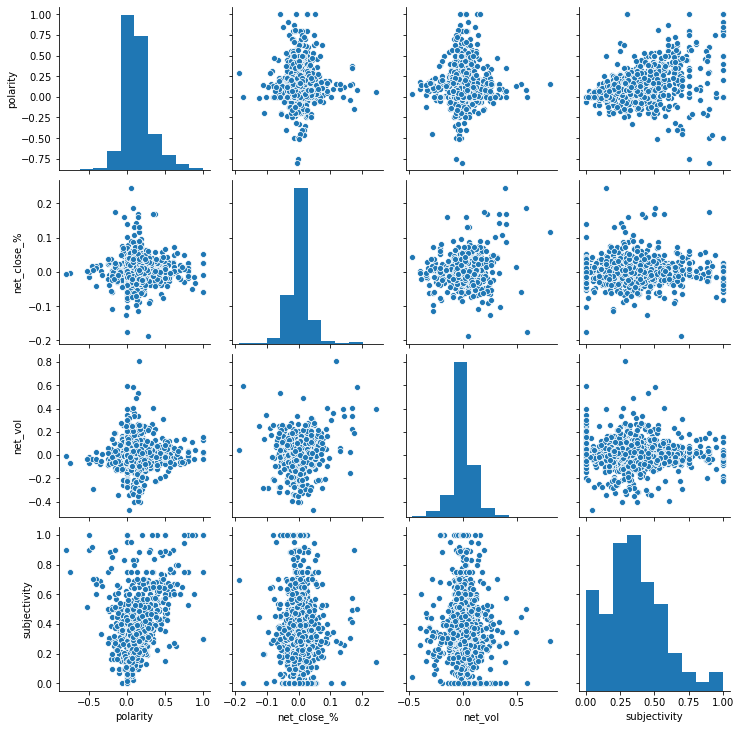

In [308]:
sns.pairplot(df[['polarity', 'net_close_%', 'net_vol', 'subjectivity']])

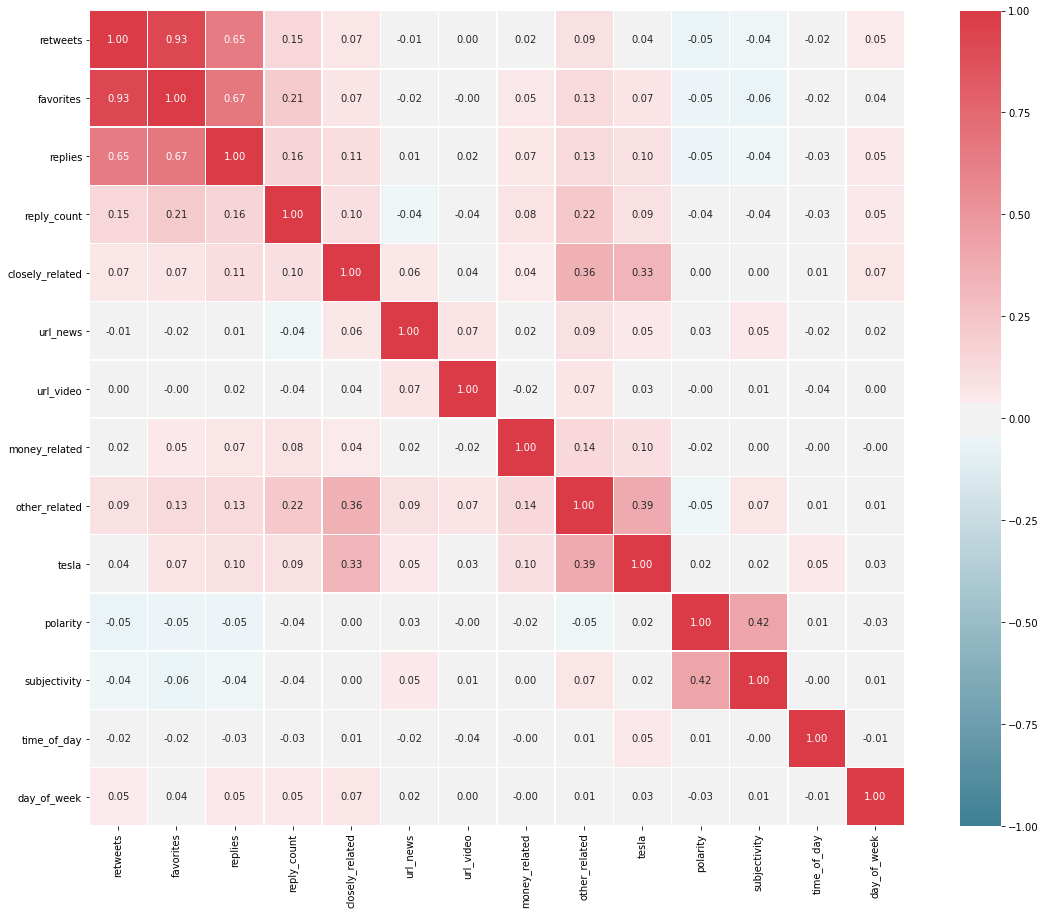

In [309]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.subplots(figsize=(20,15))
sns.heatmap(df.iloc[:,:14].corr(), cmap=cmap, vmax=1, center=0, vmin=-1,
            square=True, linewidths=.5,  annot=True, fmt=".2f")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CEA48D1E80>,
      dtype=object)

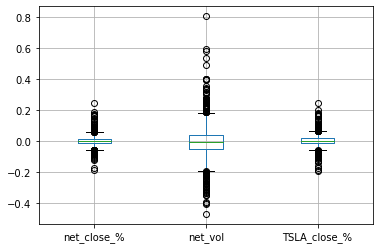

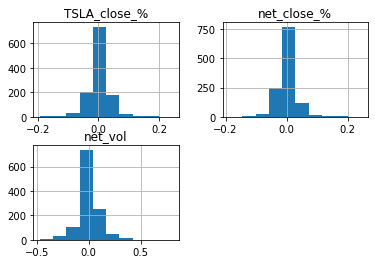

In [310]:
df[['net_close_%', 'net_vol', 'TSLA_close_%']].boxplot()
df[['net_close_%', 'net_vol', 'TSLA_close_%']].hist()

In [311]:
df['net_close_effect'] =df['net_close_%'].abs()
df['net_vol_effect']  =df['net_vol'].abs()
print(df['net_close_effect'].quantile([.25, .5, .75]))
print(df['net_vol_effect'].quantile([.25, .5, .75]))

0.25    0.006097
0.50    0.014531
0.75    0.026673
Name: net_close_effect, dtype: float64
0.25    0.020925
0.50    0.048464
0.75    0.090132
Name: net_vol_effect, dtype: float64


In [312]:
df['net_close_effect'] = df['net_close_effect'].apply(lambda x: 1 if x > 0.02 else 0)
df['net_vol_effect'] = df['net_vol_effect'].apply(lambda x: 1 if x > 0.053137 else 0)
print(df['net_close_effect'].value_counts())
print(df['net_vol_effect'].value_counts())

0    748
1    444
Name: net_close_effect, dtype: int64
0    648
1    544
Name: net_vol_effect, dtype: int64


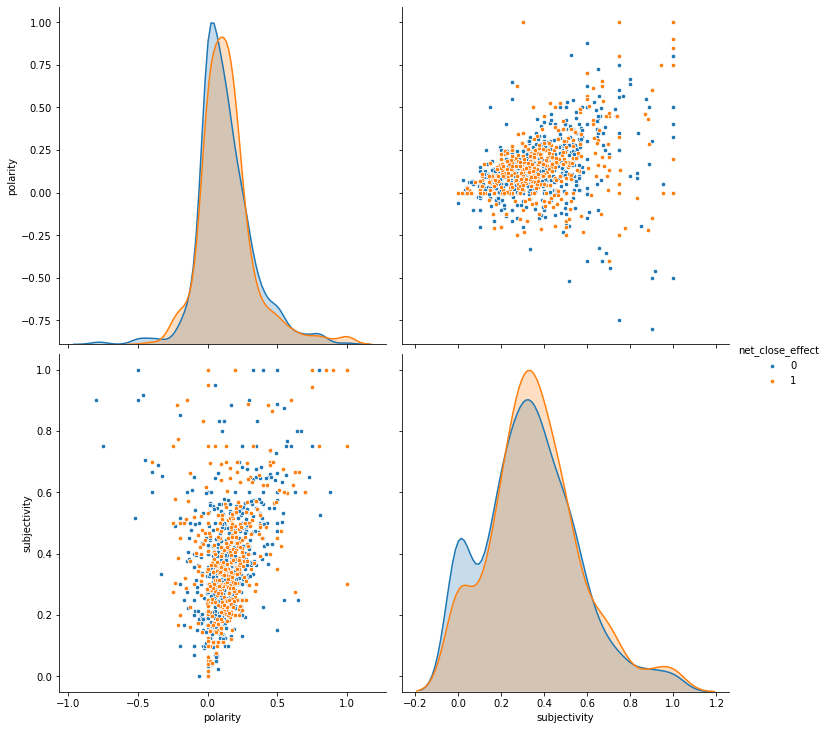

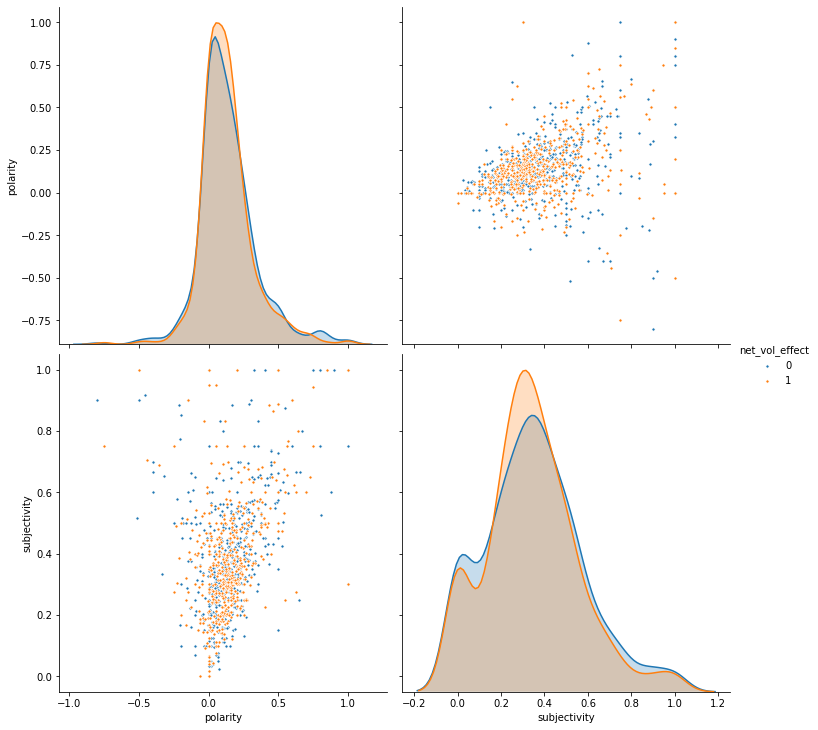

In [313]:
sns.pairplot(df[['polarity', 'subjectivity', 'net_close_effect']], hue='net_close_effect', size=5, plot_kws={"s": 20})
plt.show()
sns.pairplot(df[['polarity', 'subjectivity', 'net_vol_effect']], hue='net_vol_effect', size=5, plot_kws={"s": 10})

In [314]:
df['net_vol_effect'].abs().value_counts()

0    648
1    544
Name: net_vol_effect, dtype: int64

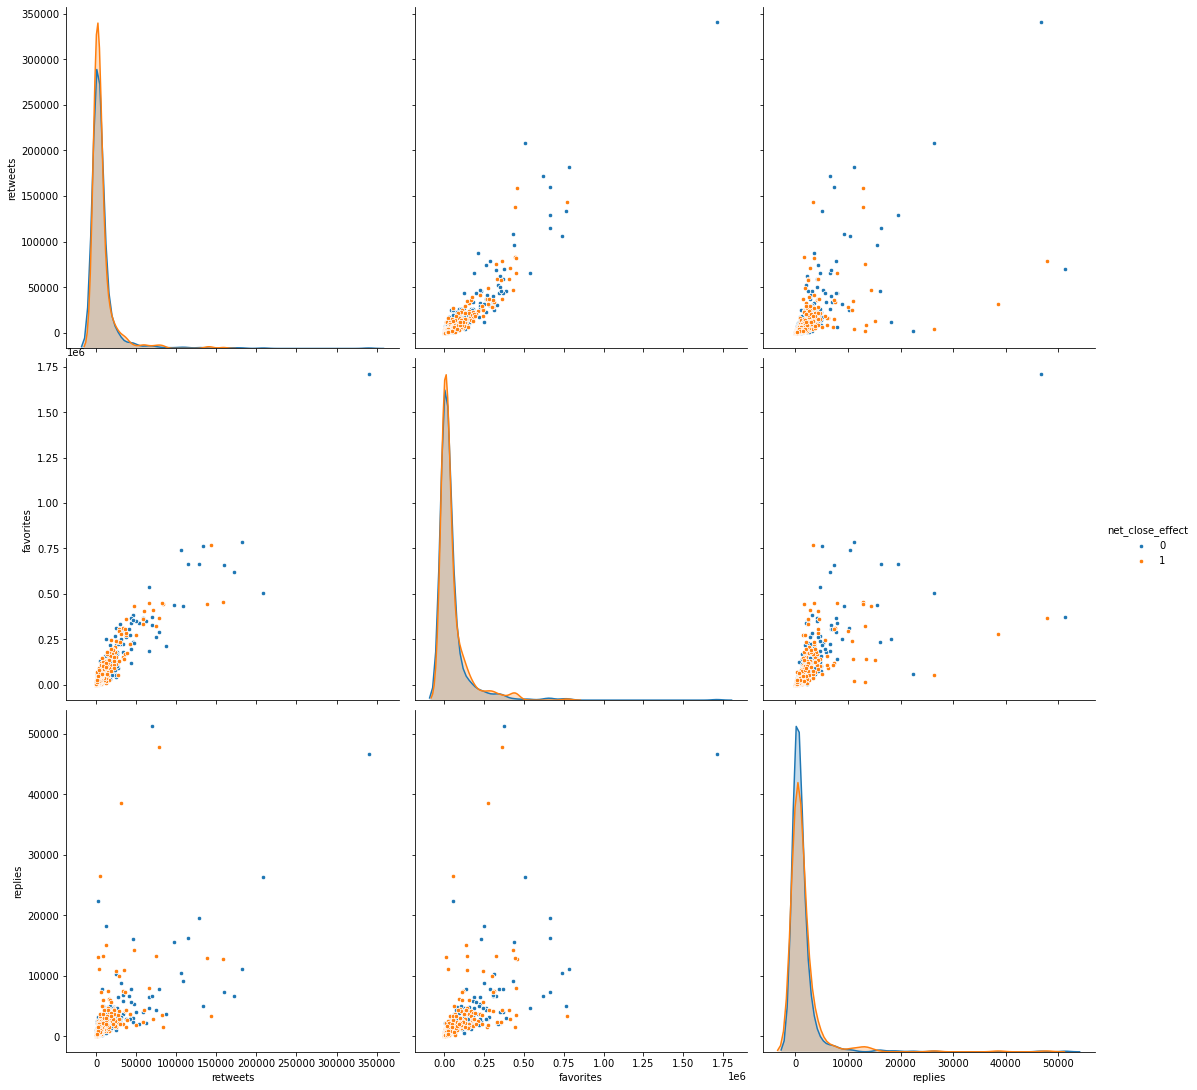

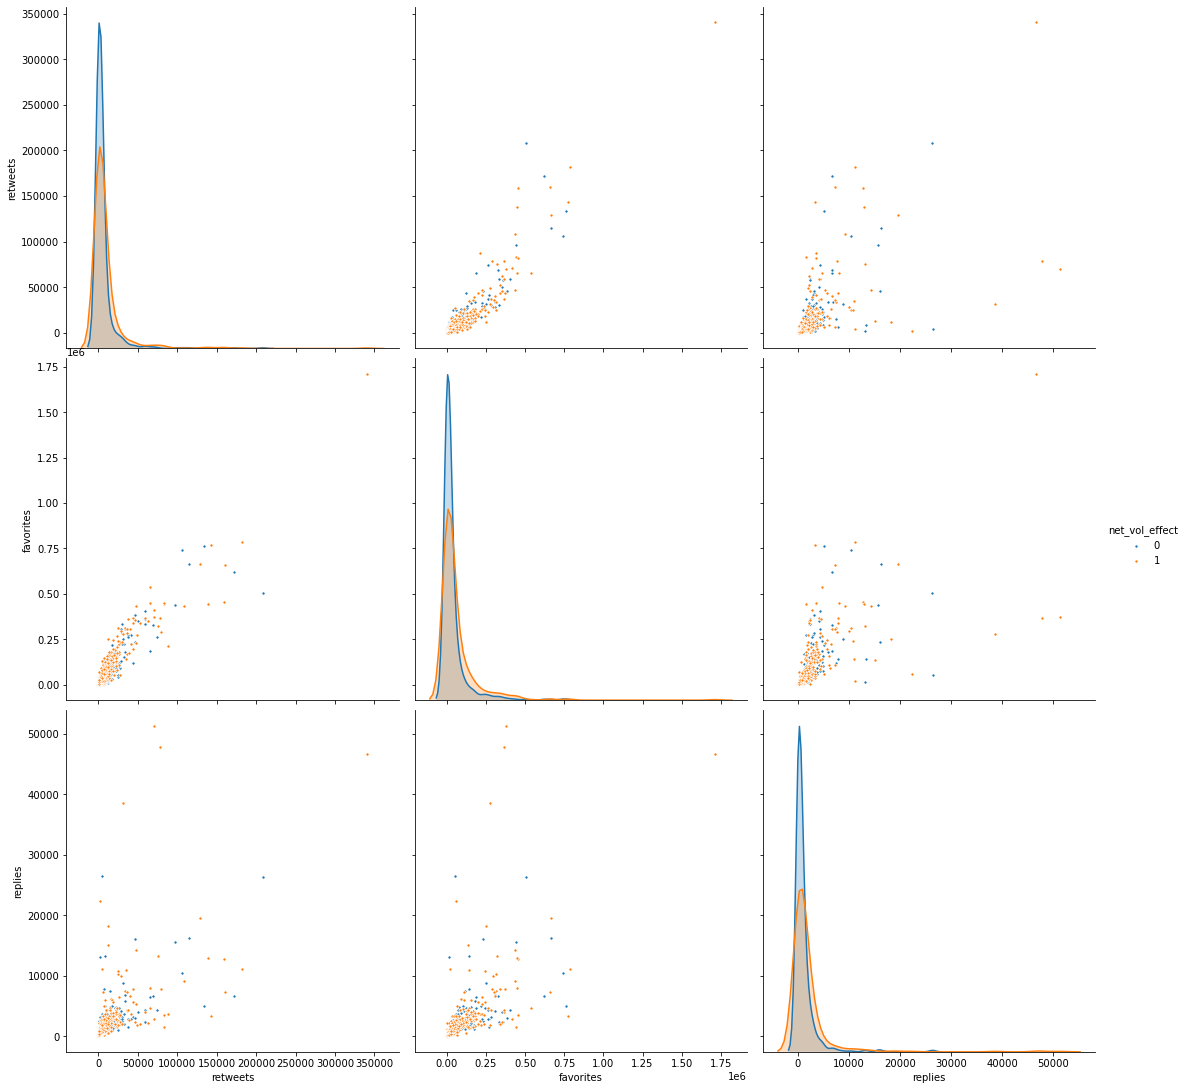

In [274]:
sns.pairplot(df[['retweets', 'favorites', 'replies', 'net_close_effect']], hue='net_close_effect', size=5, plot_kws={"s": 20})
plt.show()
sns.pairplot(df[['retweets', 'favorites', 'replies', 'net_vol_effect']], hue='net_vol_effect', size=5, plot_kws={"s": 10})

0    791
1    328
2     73
Name: tesla, dtype: int64

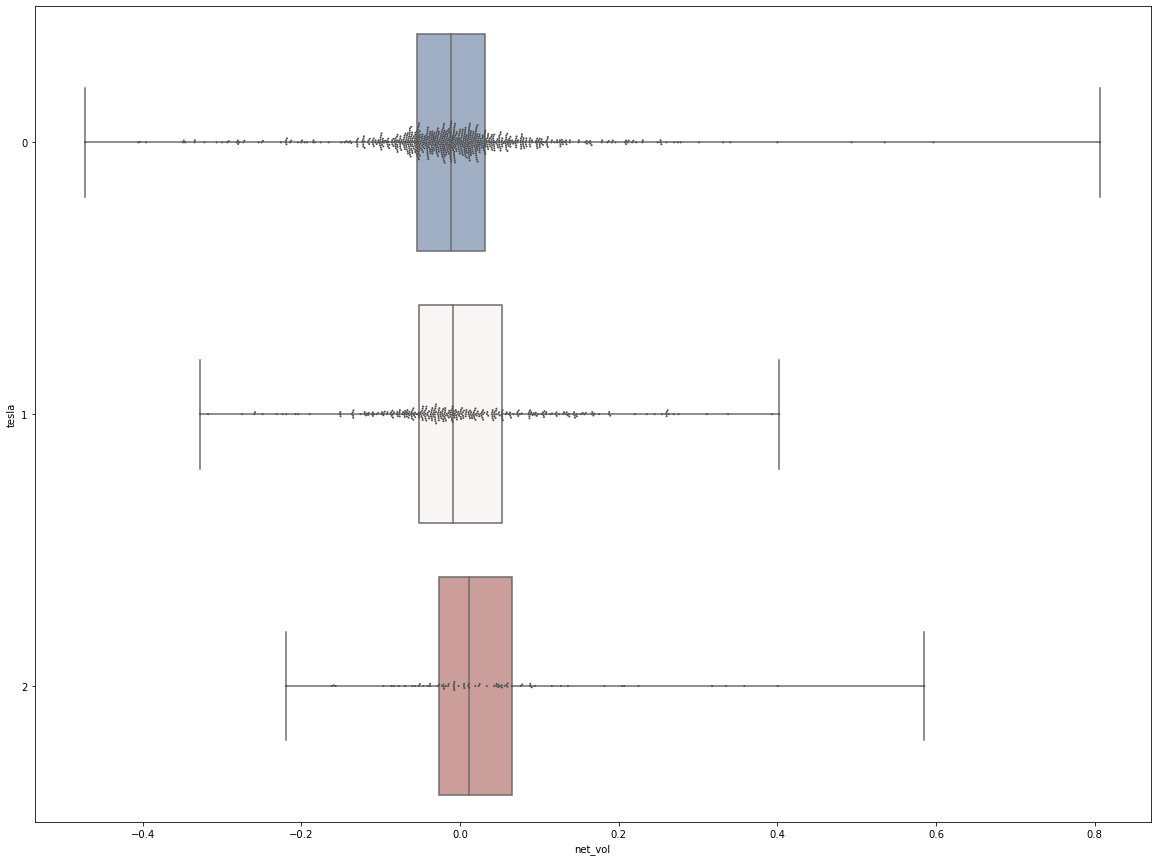

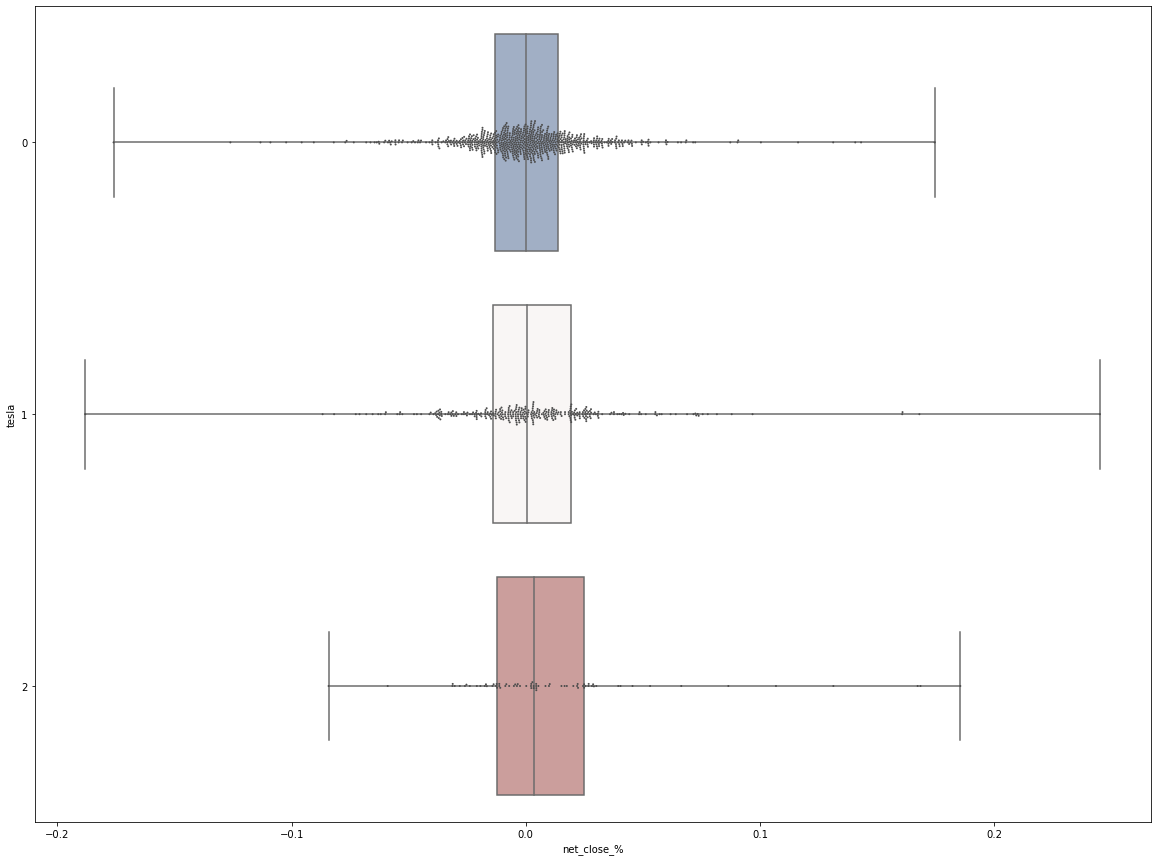

In [286]:
df['tesla'] = df['tesla'].apply(lambda x: 2 if x > 2 else x)
df['tesla'] =  df['tesla'].astype('category')
plt.subplots(figsize=(20,15))
sns.boxplot(x="net_vol", y="tesla", data=df,
            whis=[0, 100], palette="vlag")
sns.swarmplot(x="net_vol", y="tesla", data=df,
              size=2, color=".3", linewidth=0)

plt.subplots(figsize=(20,15))
sns.boxplot(x="net_close_%", y="tesla", data=df,
            whis=[0, 100], palette="vlag")
sns.swarmplot(x="net_close_%", y="tesla", data=df,
              size=2, color=".3", linewidth=0)
df['tesla'].value_counts()

0    818
1    272
2     77
3     25
Name: closely_related, dtype: int64

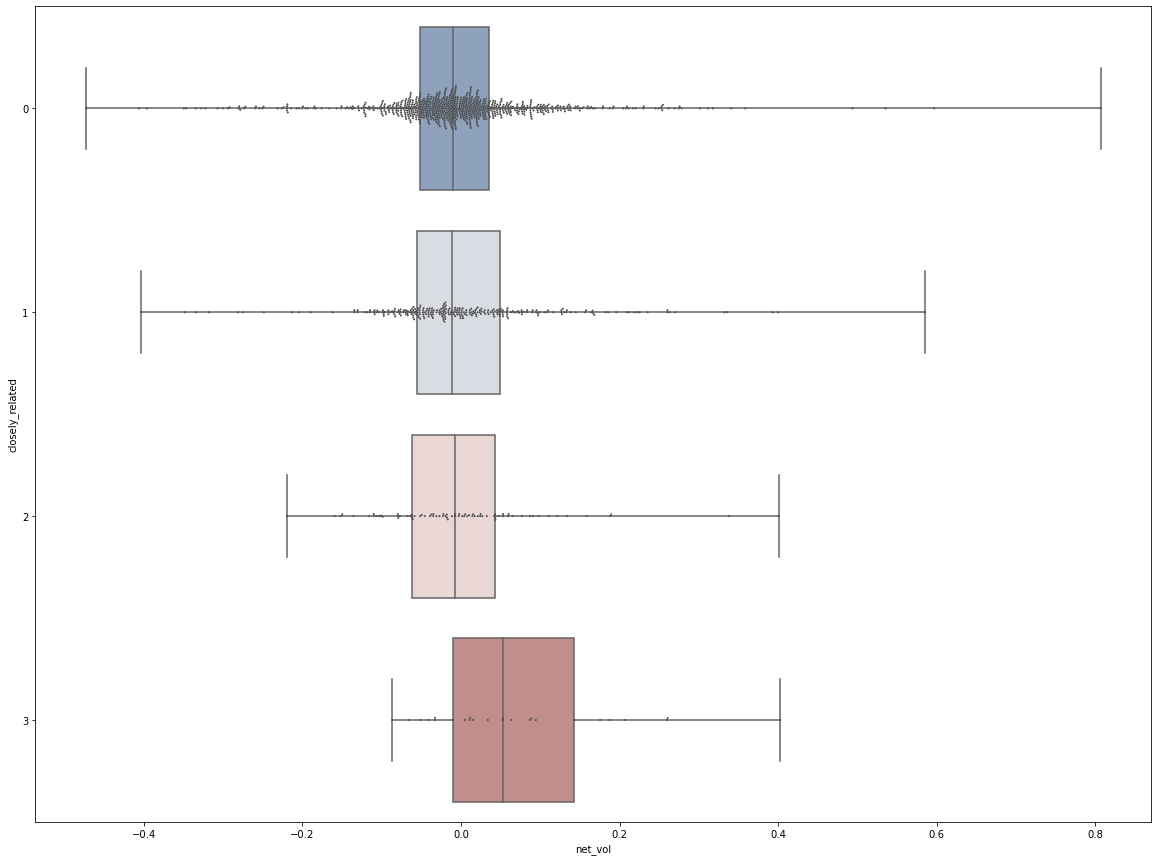

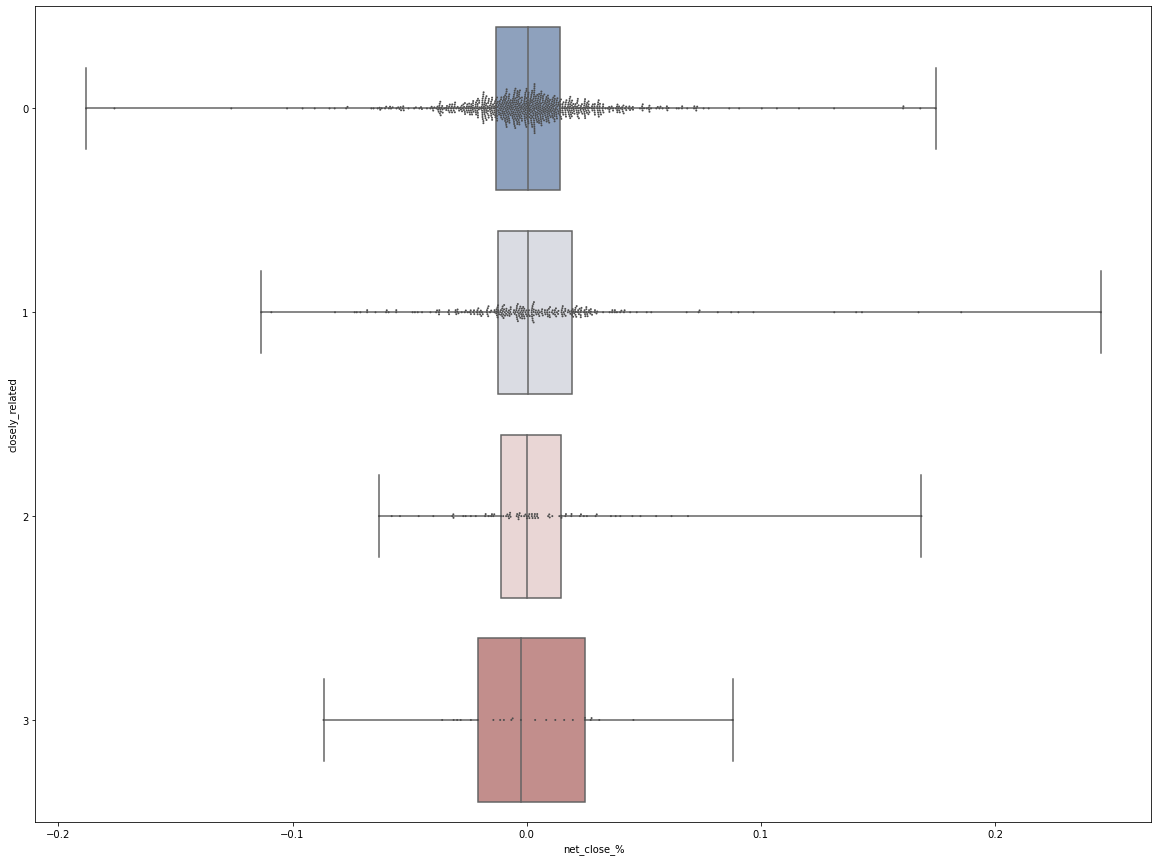

In [276]:
df['closely_related'] = df['closely_related'].apply(lambda x: 3 if x > 3 else x)
df['closely_related'] =  df['closely_related'].astype('category')
plt.subplots(figsize=(20,15))
sns.boxplot(x="net_vol", y="closely_related", data=df,
            whis=[0, 100], palette="vlag")
sns.swarmplot(x="net_vol", y="closely_related", data=df,
              size=2, color=".3", linewidth=0)

plt.subplots(figsize=(20,15))
sns.boxplot(x="net_close_%", y="closely_related", data=df,
            whis=[0, 100], palette="vlag")
sns.swarmplot(x="net_close_%", y="closely_related", data=df,
              size=2, color=".3", linewidth=0)

df['closely_related'].value_counts()

In [277]:
print(df[['money_related', 'net_close_effect']].groupby('money_related').sum())
print(df[['tesla', 'net_close_effect']].groupby('tesla').sum())

net_close_effect
money_related                  
0                           426
1                            17
2                             1
       net_close_effect
tesla                  
0                   263
1                   146
2                    35


In [291]:
y_name = 'net_vol_effect'
X = df[['retweets',	'favorites', 'replies', 'closely_related',	'url_news',	'url_video',	'money_related','reply_count',	'other_related',	'tesla',	'polarity',	'subjectivity',	'day_of_week']]
y = df[y_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [292]:
def balance(y_name, X, y):
    df_train = pd.merge(X, y, on='date')
    count_class_0, count_class_1 = df_train[y_name].value_counts()
    df_class_0  = df_train[df_train[y_name] == 0]
    df_class_1 = df_train[df_train[y_name] == 1]
    df_class_1_over = df_class_1.sample(count_class_0, replace=True)
    df_train_over = pd.concat([df_class_0, df_class_1_over], axis=0)
    X = df_train_over.iloc[:,:-1]
    y = df_train_over[y_name]
    print(df_train_over[y_name].value_counts())
balance(y_name, X_train, y_train)

1    522
0    522
Name: net_vol_effect, dtype: int64


In [293]:
y_test.value_counts()

0    126
1    113
Name: net_vol_effect, dtype: int64

In [294]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred=logreg.predict(X_test)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_rep = metrics.classification_report(y_test, y_pred)
roc_auc = metrics.roc_auc_score(y_test, y_pred)
print(conf_matrix)
print(class_rep)
print(roc_auc)

[[107  19]
 [ 82  31]]
              precision    recall  f1-score   support

           0       0.57      0.85      0.68       126
           1       0.62      0.27      0.38       113

    accuracy                           0.58       239
   macro avg       0.59      0.56      0.53       239
weighted avg       0.59      0.58      0.54       239

0.561771316196095


In [295]:
support_vector = SVC()
support_vector.fit(X_train, y_train)
y_pred=support_vector.predict(X_test)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_rep = metrics.classification_report(y_test, y_pred)
roc_auc = metrics.roc_auc_score(y_test, y_pred)
print(conf_matrix)
print(class_rep)
print(roc_auc)

[[108  18]
 [ 84  29]]
              precision    recall  f1-score   support

           0       0.56      0.86      0.68       126
           1       0.62      0.26      0.36       113

    accuracy                           0.57       239
   macro avg       0.59      0.56      0.52       239
weighted avg       0.59      0.57      0.53       239

0.556890012642225


In [296]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred=random_forest.predict(X_test)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_rep = metrics.classification_report(y_test, y_pred)
roc_auc = metrics.roc_auc_score(y_test, y_pred)
print(conf_matrix)
print(class_rep)
print(roc_auc)

[[88 38]
 [69 44]]
              precision    recall  f1-score   support

           0       0.56      0.70      0.62       126
           1       0.54      0.39      0.45       113

    accuracy                           0.55       239
   macro avg       0.55      0.54      0.54       239
weighted avg       0.55      0.55      0.54       239

0.5438966146930748


In [297]:
bayes = GaussianNB()
bayes.fit(X_train, y_train)
y_pred=bayes.predict(X_test)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_rep = metrics.classification_report(y_test, y_pred)
roc_auc = metrics.roc_auc_score(y_test, y_pred)
print(conf_matrix)
print(class_rep)
print(roc_auc)

[[121   5]
 [ 98  15]]
              precision    recall  f1-score   support

           0       0.55      0.96      0.70       126
           1       0.75      0.13      0.23       113

    accuracy                           0.57       239
   macro avg       0.65      0.55      0.46       239
weighted avg       0.65      0.57      0.48       239

0.5465304115746594


In [298]:
X_train = X_train.astype('float')
X_test = X_test.astype('float')
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_rep = metrics.classification_report(y_test, y_pred)
roc_auc = metrics.roc_auc_score(y_test, y_pred)
print(conf_matrix)
print(class_rep)
print(roc_auc)

[[74 52]
 [64 49]]
              precision    recall  f1-score   support

           0       0.54      0.59      0.56       126
           1       0.49      0.43      0.46       113

    accuracy                           0.51       239
   macro avg       0.51      0.51      0.51       239
weighted avg       0.51      0.51      0.51       239

0.5104649529428291


In [299]:
neigh = KNeighborsClassifier (n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_rep = metrics.classification_report(y_test, y_pred)
roc_auc = metrics.roc_auc_score(y_test, y_pred)
print(conf_matrix)
print(class_rep)
print(roc_auc)

[[79 47]
 [70 43]]
              precision    recall  f1-score   support

           0       0.53      0.63      0.57       126
           1       0.48      0.38      0.42       113

    accuracy                           0.51       239
   macro avg       0.50      0.50      0.50       239
weighted avg       0.51      0.51      0.50       239

0.5037575502177272
